# Titanic Exploratory Data Analysis
The Titanic was a luxury British steamship that sank in the early hours of April 15, 1912 after striking an iceberg, leading to the deaths of more than 1,500 passengers and crew.

<font color = 'blue'>
Content: 

1. [Load and Check Data](#1)

1. [Variable Description](#2)
    * [Univariate Variable Analysis](#3)
        * [Categorical Variable Analysis](#4)
        * [Numerical Variable Analysis](#5)
        
1. [Basic Data Analysis](#6)
1. [Outlier Detection](#7)
1. [Missing Value](#8)
    * [Find Missing Value](#9)
    * [Fill Missing Value](#10)
1. [Visualizations](#11)

In [172]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by cicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


<a id = '1'> </a> </br>
# Load and Check Data

In [173]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
test_PassengerId = test_df['PassengerId']

In [174]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [175]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [176]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id = '2'> </a> </br>
# Variable Description
1. PassengerId: id number to each passenger
1. Survived: passenger survive(1) or died(0)
1. Pclass: passenger class
1. Name: name
1. Sex: gender of passenger
1. Age: age of passenger
1. SibSp: number of siblings/spouse
1. Parch: number of parents/children
1. Ticket: ticket number
1. Fare: amount of money spent on ticket
1. Cabin: cabin category
1. Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

In [177]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* float64(2): Fare and Age
* int64(5): Pclass, sibsp, parch, passengerId and survived
* object(5): Cabin, embarked, ticket, name and sex

 [Variable Description](#2)
    * [Univariate Variable Analysis](#3)
        * [Categorical Variable Analysis](#4)
        * [Numerical Variable Analysis](#5)

[](http://)

<a id = '3'> </a> </br>
# Univariate Variable Analysis
* Categorical Variable: Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, Sibsp and Parch
* Numerical Variable: Fare, age and passengerId

<a id = '4'> </a> </br>
## Categorical Variable

In [178]:
def bar_plot(variable):
    '''
        input variable example: 'Sex'
        output: bar plot & value count
    '''
    # get feature
    var = train_df[variable]
    # cont number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel('Frequency')
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

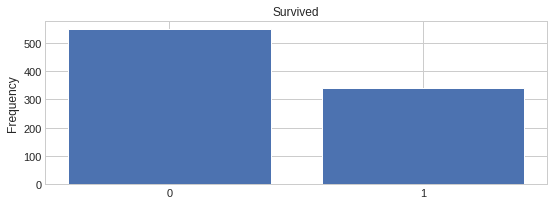

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


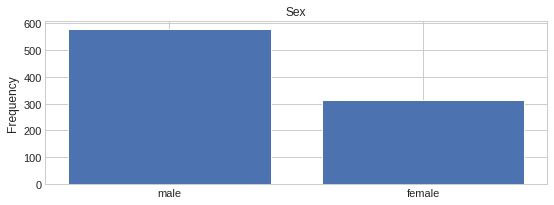

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


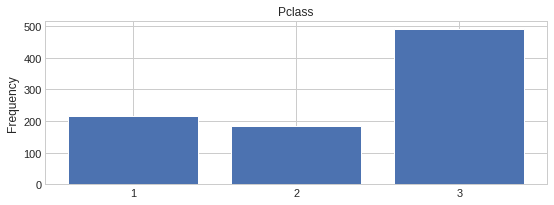

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


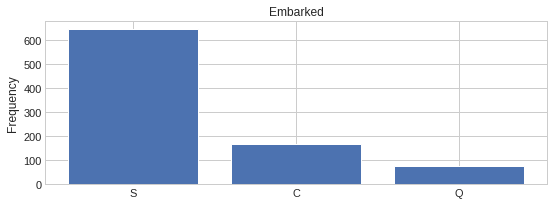

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


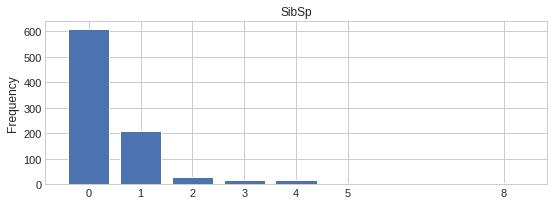

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


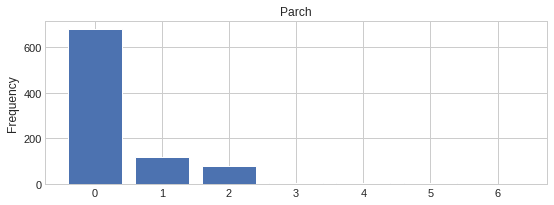

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [179]:
category1 = ["Survived","Sex","Pclass","Embarked","SibSp","Parch"]
for c in category1:
    bar_plot(c)

In [180]:
category2 = ['Cabin', 'Name', 'Ticket']
for c in category2:
    print('{} \n'.format(train_df[c].value_counts()))

C23 C25 C27    4
B96 B98        4
G6             4
F33            3
F2             3
              ..
C30            1
C128           1
F E69          1
B73            1
B4             1
Name: Cabin, Length: 147, dtype: int64 

Laroche, Mr. Joseph Philippe Lemercier       1
Kallio, Mr. Nikolai Erland                   1
Strandberg, Miss. Ida Sofia                  1
Mellors, Mr. William John                    1
Vander Planke, Miss. Augusta Maria           1
                                            ..
Ponesell, Mr. Martin                         1
Cacic, Miss. Marija                          1
Rekic, Mr. Tido                              1
McCoy, Miss. Agnes                           1
Carter, Mrs. William Ernest (Lucile Polk)    1
Name: Name, Length: 891, dtype: int64 

1601        7
CA. 2343    7
347082      7
347088      6
3101295     6
           ..
PC 17473    1
365226      1
19972       1
349224      1
345763      1
Name: Ticket, Length: 681, dtype: int64 



<a id = '5'> </a> </br>
## Numerical Variable

In [181]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title('{} distribution with hist'.format(variable))
    plt.show()

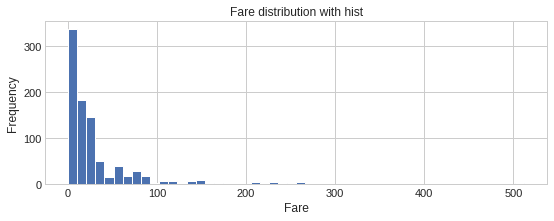

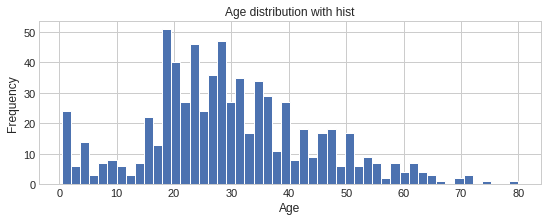

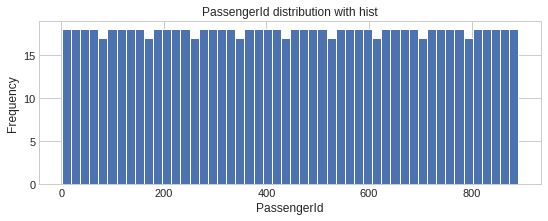

In [182]:
numericVar = ['Fare', 'Age','PassengerId']
for n in numericVar:
    plot_hist(n)

<a id = '6'> </a> </br>
# Basic Data Analysis

* Plcass - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived

In [183]:
train_df[['Pclass','Survived']]

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [184]:
# Pclass - Survived
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by='Survived',ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [185]:
# Sex - Survived
train_df[['Sex','Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by='Survived',ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [186]:
# SibSp - Survived
train_df[['SibSp','Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by='Survived',ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [187]:
# Parch - Survived
train_df[['Parch','Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by='Survived',ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<a id = '7'> </a> </br>
# Outlier Detection

In [188]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for n in features:
        # 1st quartile
        Q1 = np.percentile(df[n],25)
        # 3rd quartile
        Q3 = np.percentile(df[n],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their ineces
        outlier_list_col = df[(df[n] < Q1 - outlier_step) | (df[n] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [189]:
# Counter example
# 3: a 2: b
a_example = ["a","a","a","b","b"]
Counter(a_example)

Counter({'a': 3, 'b': 2})

In [190]:
train_df.loc[detect_outliers(train_df,['Age','SibSp','Parch','Fare'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [191]:
# drop outliers
train_df = train_df.drop(detect_outliers(train_df,['Age','SibSp','Parch','Fare']),axis=0).reset_index(drop = True)

<a id = '8'> </a> </br>
# Missing Value
   * Find Missing Value
   * Fill Missing Value

In [192]:
train_df_len = len(train_df)
train_df = pd.concat([train_df,test_df],axis = 0).reset_index(drop = True)

In [193]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id = '9'> </a> </br>
## Find Missing Value

In [194]:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [195]:
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

<a id = '10'> </a> </br>
## Fill Missing Value
* Embarked has 2 missing value
* Fare has only 1

In [196]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


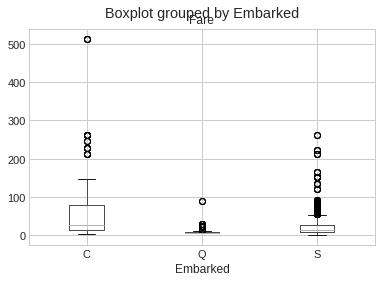

In [197]:
train_df.boxplot(column="Fare",by = "Embarked")
plt.show()

In [198]:
train_df["Embarked"] = train_df["Embarked"].fillna('C') 
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [199]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [200]:
np.mean(train_df[train_df["Pclass"] == 3]["Fare"])

12.741219971469327

In [201]:
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3]["Fare"]))

In [202]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id = '11'> </a> </br>
## Visualizatons
* Correlation
* Pclass - Survived
* Age - Survived

### Correlation

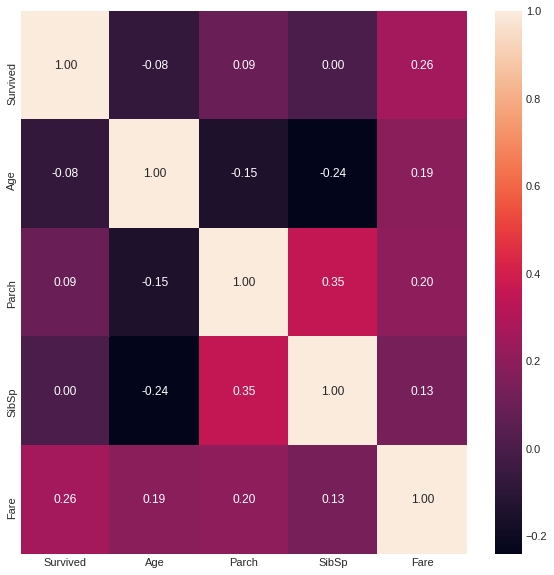

In [203]:
Group_features = ['Survived','Age','Parch','SibSp','Fare']
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(train_df[Group_features].corr(), annot = True, fmt = '.2f')
plt.show()

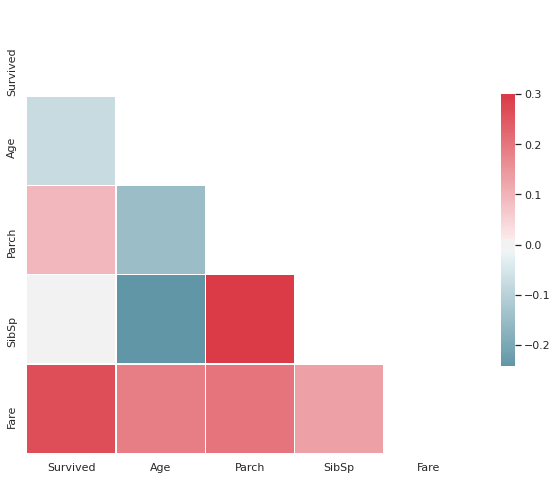

In [204]:
corr = train_df[Group_features].corr()
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Pclass - Survived

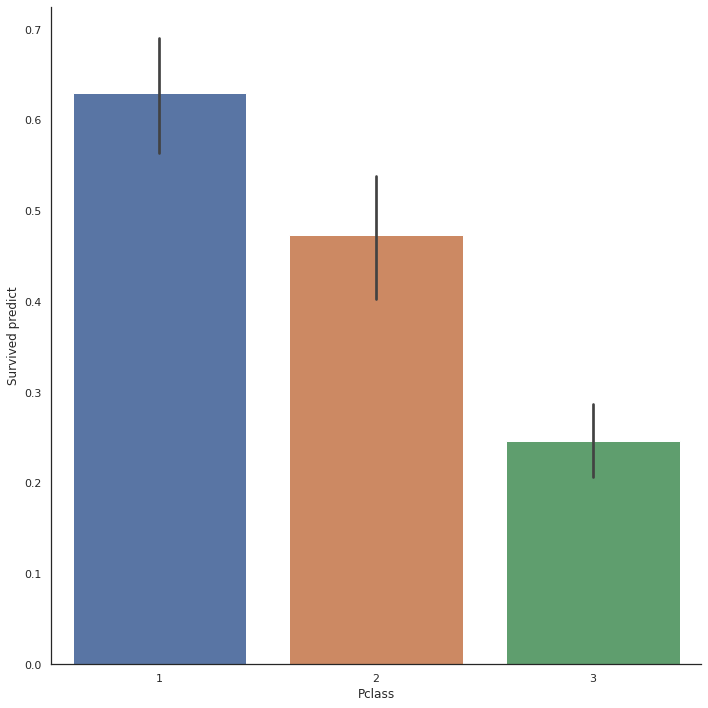

In [205]:
a = sns.factorplot(x = 'Pclass', y = 'Survived', data = train_df, kind = 'bar', size = 10)
a.set_ylabels('Survived predict')
plt.show()

### Age - Survived

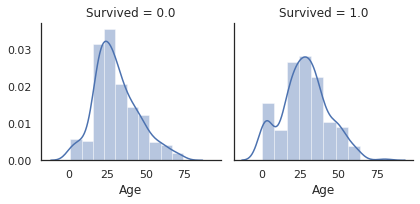

In [206]:
a = sns.FacetGrid(train_df, col = "Survived")
a.map(sns.distplot, "Age", bins = 10)
plt.show()

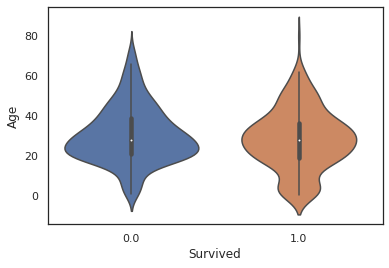

In [207]:
sns.violinplot("Survived", "Age", data=train_df);

  died(0) or survive(1)